# TSAI Assignment 7 - Code 7

### Model7:
###### Target
Improve accuracy - by increasing receptivity field, using LROnPlateau
(Reduce/retain channel size while adding another layer for receptivity, Increases parameters due to the additional layer. Retain droputs)
###### Result
Model Parameters - 5,918
Train Accuracy - 99.24%
Test accuracy - 99.03%%
##### Analysis
A decent increase in accuracy, but model tends to coverge at a lesser accuracy

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [3]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## MODEL - 7

In [5]:
from models import model_7
myNextModel = model_7.getModel()

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

optimizer = optim.SGD(myNextModel.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.5, patience=3, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myNextModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myNextModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step(tst_acc[0])

Epoch 1


  0%|                                                                                          | 0/118 [00:00<?, ?it/s]D:\SRT_Courses\MachineLearning\TSAI\Session7\S7\models\model_7.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train: Loss=0.1171 Batch_id=117 Accuracy=90.67: 100%|████████████████████████████████| 118/118 [00:16<00:00,  6.99it/s]


Test set: Average loss: 0.0709, Accuracy: 9791/10000 (97.91%)

Epoch 2


Train: Loss=0.0187 Batch_id=117 Accuracy=97.80: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.40it/s]


Test set: Average loss: 0.0527, Accuracy: 9833/10000 (98.33%)

Epoch 3


Train: Loss=0.0589 Batch_id=117 Accuracy=98.19: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.79it/s]


Test set: Average loss: 0.0448, Accuracy: 9859/10000 (98.59%)

Epoch 4


Train: Loss=0.0703 Batch_id=117 Accuracy=98.37: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.59it/s]


Test set: Average loss: 0.0500, Accuracy: 9839/10000 (98.39%)

Epoch 5


Train: Loss=0.0466 Batch_id=117 Accuracy=98.60: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.89it/s]


Test set: Average loss: 0.0404, Accuracy: 9870/10000 (98.70%)

Epoch 00005: reducing learning rate of group 0 to 5.0000e-02.
Epoch 6


Train: Loss=0.1136 Batch_id=117 Accuracy=98.90: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.04it/s]


Test set: Average loss: 0.0392, Accuracy: 9875/10000 (98.75%)

Epoch 7


Train: Loss=0.0225 Batch_id=117 Accuracy=99.01: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.93it/s]


Test set: Average loss: 0.0321, Accuracy: 9896/10000 (98.96%)

Epoch 8


Train: Loss=0.0524 Batch_id=117 Accuracy=99.09: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.01it/s]


Test set: Average loss: 0.0327, Accuracy: 9893/10000 (98.93%)

Epoch 9


Train: Loss=0.0061 Batch_id=117 Accuracy=99.10: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.61it/s]


Test set: Average loss: 0.0324, Accuracy: 9899/10000 (98.99%)

Epoch 00009: reducing learning rate of group 0 to 2.5000e-02.
Epoch 10


Train: Loss=0.0356 Batch_id=117 Accuracy=99.21: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.67it/s]


Test set: Average loss: 0.0310, Accuracy: 9905/10000 (99.05%)

Epoch 11


Train: Loss=0.0157 Batch_id=117 Accuracy=99.22: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.19it/s]


Test set: Average loss: 0.0286, Accuracy: 9912/10000 (99.12%)

Epoch 12


Train: Loss=0.0236 Batch_id=117 Accuracy=99.28: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.01it/s]


Test set: Average loss: 0.0294, Accuracy: 9901/10000 (99.01%)

Epoch 13


Train: Loss=0.0418 Batch_id=117 Accuracy=99.27: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.37it/s]


Test set: Average loss: 0.0308, Accuracy: 9904/10000 (99.04%)

Epoch 00013: reducing learning rate of group 0 to 1.2500e-02.
Epoch 14


Train: Loss=0.0250 Batch_id=117 Accuracy=99.33: 100%|████████████████████████████████| 118/118 [00:09<00:00, 12.33it/s]


Test set: Average loss: 0.0296, Accuracy: 9906/10000 (99.06%)

Epoch 15


Train: Loss=0.0835 Batch_id=117 Accuracy=99.33: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.61it/s]


Test set: Average loss: 0.0291, Accuracy: 9911/10000 (99.11%)

Epoch 16


Train: Loss=0.0322 Batch_id=117 Accuracy=99.39: 100%|████████████████████████████████| 118/118 [00:09<00:00, 11.99it/s]


Test set: Average loss: 0.0293, Accuracy: 9908/10000 (99.08%)

Epoch 17


Train: Loss=0.0232 Batch_id=117 Accuracy=99.37: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.15it/s]


Test set: Average loss: 0.0290, Accuracy: 9908/10000 (99.08%)

Epoch 00017: reducing learning rate of group 0 to 6.2500e-03.
Epoch 18


Train: Loss=0.0790 Batch_id=117 Accuracy=99.37: 100%|████████████████████████████████| 118/118 [00:09<00:00, 13.05it/s]


Test set: Average loss: 0.0291, Accuracy: 9911/10000 (99.11%)

Epoch 19


Train: Loss=0.0167 Batch_id=117 Accuracy=99.36: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.98it/s]


Test set: Average loss: 0.0293, Accuracy: 9908/10000 (99.08%)

Epoch 20


Train: Loss=0.0199 Batch_id=117 Accuracy=99.44: 100%|████████████████████████████████| 118/118 [00:08<00:00, 13.56it/s]


Test set: Average loss: 0.0285, Accuracy: 9908/10000 (99.08%)



Print the model summary to know your model

In [7]:
utils.printModelSummary(myNextModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              40
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5            [-1, 4, 24, 24]             148
              ReLU-6            [-1, 4, 24, 24]               0
       BatchNorm2d-7            [-1, 4, 24, 24]               8
           Dropout-8            [-1, 4, 24, 24]               0
         MaxPool2d-9            [-1, 4, 12, 12]               0
           Conv2d-10            [-1, 8, 10, 10]             296
             ReLU-11            [-1, 8, 10, 10]               0
      BatchNorm2d-12            [-1, 8, 10, 10]              16
          Dropout-13            [-1, 8, 10, 10]               0
           Conv2d-14              [-1, 

Plot the train and test accuracy

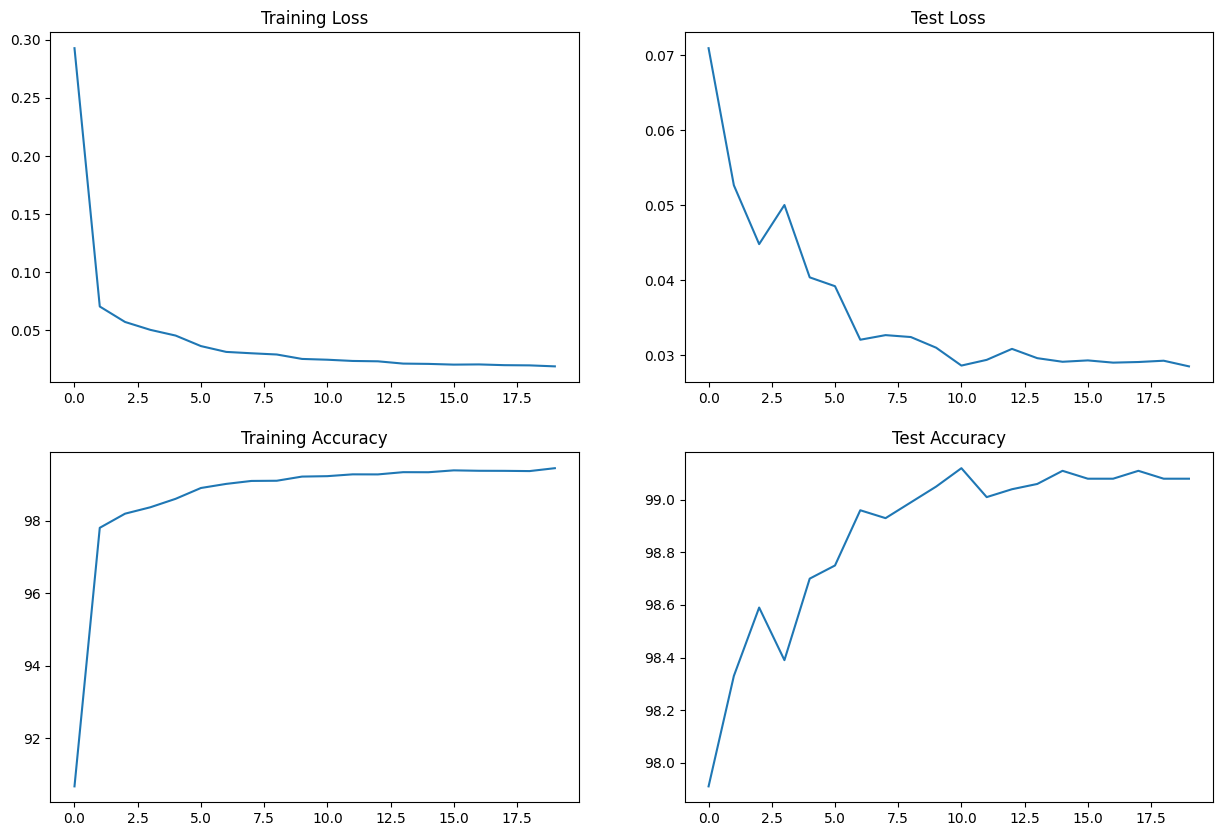

In [8]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)